# Lecture 18: The Ising Model
Prof. Flip Tanedo  
1 June 2017

References: 
* *Computational Physics*, Newman
* *Computational Physics, 2nd ed*, Giordano and Nakanishi  
* https://compphys.go.ro/the-ising-model/
* https://github.com/CorySimon/IsingModel/blob/master/Ising%20Model.ipynb
* http://rajeshrinet.github.io/blog/2014/ising-model/ (*)

I borrow liberally from these sources.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import * # clunky, but allows random() and randint(a,b)

N = 3
N_trials = 100

In [2]:
# Initialize the grid
grid = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        # assign a random +1 or -1 sping
        grid[i][j] = 2*randint(0,1) - 1 
        
print(grid)

[[-1. -1.  1.]
 [ 1.  1. -1.]
 [ 1. -1. -1.]]


In [3]:
def new_spin(some_grid, beta, i, j):
    """
    Takes the grid and the temperature,
    runs Metropolis algorithm to give the
    updated value of the (i,j) element.
    """
    spin = some_grid[i,j]
    spin_flip = -spin

##  TESTING
    print(i)
    print(j)
    print("spin is:") 
    print(some_grid[i,j])

    
#   Periodic boundary conditions
    net_neighbor_spin = \
        some_grid[(i+1)%N,j] + \
        some_grid[(i-1)%N,j] + \
        some_grid[i,(j+1)%N] + \
        some_grid[i,(j-1)%N]
        
    deltaE = -spin_flip*net_neighbor_spin/4 - \
             (-spin*net_neighbor_spin/4)
##  TESTING
    print("deltaE is")
    print(deltaE)
        
    if deltaE < 0:
        print("lower E, flipped")
        return -spin
    
    else:
        if random() < np.exp(beta*deltaE):
            print("lucky roll, flipped")
            return -spin
        else:
            print("no flip")
            return spin

# print(grid)
# print(new_spin(grid,1,1,2))

In [4]:
# DEFINE QUIET VERSION
def new_spin(some_grid, beta, i, j):
    """
    Takes the grid and the temperature,
    runs Metropolis algorithm to give the
    updated value of the (i,j) element.
    """
    spin = some_grid[i,j]
    spin_flip = -spin

# ##  TESTING
#     print(i)
#     print(j)
#     print("spin is:") 
#     print(some_grid[i,j])

    
#   Periodic boundary conditions
    net_neighbor_spin = \
        some_grid[(i+1)%N,j] + \
        some_grid[(i-1)%N,j] + \
        some_grid[i,(j+1)%N] + \
        some_grid[i,(j-1)%N]
        
    deltaE = -spin_flip*net_neighbor_spin/4 - \
             (-spin*net_neighbor_spin/4)
# ##  TESTING
#     print("deltaE is")
#     print(deltaE)
        
    if deltaE < 0:
#         print("lower E, flipped")
        return -spin
    
    else:
        if random() < np.exp(beta*deltaE):
#             print("lucky roll, flipped")
            return -spin
        else:
#             print("no flip")
            return spin

In [5]:
def grid_update(some_grid, beta):
    i = randint(0,N-1)
    j = randint(0,N-1)
#     new_grid = some_grid
#     new_grid[i,j] = new_spin(some_grid, beta, i, j)
#     return new_grid
    some_grid[i,j] = new_spin(some_grid, beta, i, j)

print(grid)
grid_update(grid,1)
print(grid)

[[-1. -1.  1.]
 [ 1.  1. -1.]
 [ 1. -1. -1.]]
[[-1. -1.  1.]
 [ 1.  1.  1.]
 [ 1. -1. -1.]]


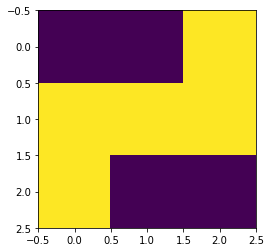

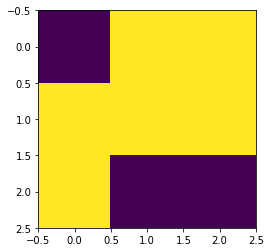

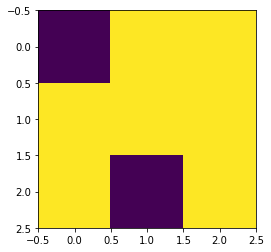

In [6]:
record = []
for a in range(N_trials):
    record.append(np.array(grid))
    # Note: the np.array(...) is important,
    #  this assigns a value rather than a reference.
    #  If you just did record.append(grid), you 
    #  append a reference to the current value of "grid"
    #  ... this gets updated, and so every element of record gets updated
    grid_update(grid,1) 
    
for a in range(3):
    plt.imshow(record[a])
    plt.show()

## Animation Fun

<IPython.core.display.Javascript object>


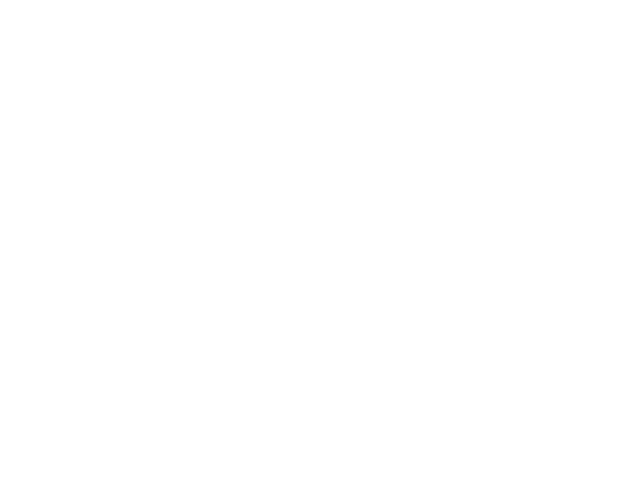

In [7]:
%matplotlib notebook
# import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5')

def animate(i):
    return plt.imshow(record[i])

fig = plt.figure()
ani = animation.FuncAnimation(fig, animate, interval=1000, blit=True)
# plt.show()

# Bigger!

In [8]:
N = 64
N_trials = 3000
temperature = .5*2.26
beta = 1/temperature

grid = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        # assign a random +1 or -1 sping
        grid[i][j] = 2*randint(0,1) - 1 
        
record = []
for a in range(N_trials):
    record.append(np.array(grid))
    grid_update(grid,beta) 

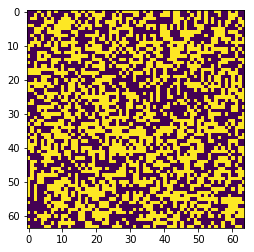

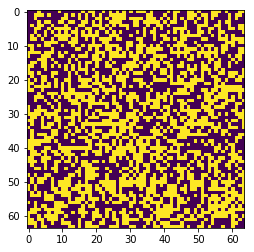

In [9]:
%matplotlib inline

plt.imshow(record[0])
plt.show()


plt.imshow(record[N_trials-1])
plt.show()


In [10]:
%matplotlib inline